In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.8 MB/s eta 0:00:00


In [3]:
pd.set_option('display.max_columns', None)

In [ ]:
df_new = pd.read_excel(r'C:\project2\mini\data\연령_및_성별_인구_–_읍면동_20250408202336.xlsx')
df_new

name_map = {
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종',
    '경기도': '경기',
    '강원특별자치도': '강원',
    '충청북도': '충북',
    '충청남도': '충남',
    '전라북도': '전북',
    '전라남도': '전남',
    '경상북도': '경북',
    '경상남도': '경남',
    '제주특별자치도': '제주',
    '전국': '전국'  # 혹시 포함돼 있다면
}

df_new['행정구역별(읍면동)'] = df_new['행정구역별(읍면동)'].map(name_map)
df_new.drop(index=0, inplace=True)

df_new.set_index('행정구역별(읍면동)', inplace=True)

df_new.index.name = '시도명'

df_new

,2019,2020,2021
시도명,,,
서울,1419947,1499448,1564390
부산,602719,638890,670108
대구,373465,394279,413854
인천,378330,405595,432149
광주,196320,207509,216317
대전,196886,209143,220869
울산,129985,140770,150768
세종,30280,32993,35727
경기,1629860,1758085,1874756


In [16]:
df_new = df_new.sort_index(ascending=True)
df_new

,2019,2020,2021
시도명,,,
강원,292473,308977,324129
경기,1629860,1758085,1874756
경남,532585,564903,593701
경북,533578,557654,581109
광주,196320,207509,216317
대구,373465,394279,413854
대전,196886,209143,220869
부산,602719,638890,670108
서울,1419947,1499448,1564390


In [21]:
df_new19=df_new['2019']
df_new20=df_new['2020']
df_new21=df_new['2021']

In [ ]:
df_medical20 = pd.read_excel('C:\project2\mini\data\2019.xlsx')
df_medical20 = df_medical20.drop(df_medical20.columns[[4, 8, 12]], axis=1)
df_medical20
df_medical20.sort_values(by='시도', ascending=True, inplace=True)

In [22]:
df_medical20.insert(
    loc=1,
    column='노인인구',
    value= df_new19.values
)

In [23]:
df_medical20.columns = [
    '시도명', '65세이상 노인인구',
    '계_시설수', '계_입소정원', '계_입소현원',
    '노인요양시설수', '노인요양시설_정원', '노인요양시설_현원',
    '노인요양공동생활가정수', '노인요양공동생활가정_정원', '노인요양공동생활가정_현원', '연도'
    ]

In [24]:
df_medical20

,시도명,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도
0,강원,292473,306,10374,9140,192,9328,8208,114,1046,932,2019
1,경기,1629860,1824,53863,53055,1193,48975,48292,631,4888,4763,2019
2,경남,532585,238,10632,9161,189,10205,8803,49,427,358,2019
3,경북,533578,397,14169,11543,272,13077,10588,125,1092,955,2019
4,광주,196320,95,3527,2913,78,3384,2783,17,143,130,2019
5,대구,373465,252,7974,7338,112,6732,6150,140,1242,1188,2019
11,대전,196886,128,5259,5148,88,4934,4838,40,325,310,2019
10,부산,602719,113,6363,5234,92,6179,5099,21,184,135,2019
12,서울,1419947,509,15176,14619,205,12493,12053,304,2683,2566,2019
6,세종,30280,13,565,468,11,547,454,2,18,14,2019


In [25]:
df_medical20['노인인구당 총시설수'] = df_medical20['계_시설수'] / df_medical20['65세이상 노인인구'] * 10000 # 총시설수 대비 노인인구
df_medical20.sort_values(by='노인인구당 총시설수', ascending=False).head()
df_medical20['노인인구당 요양시설수'] = df_medical20['노인요양시설수'] / df_medical20['65세이상 노인인구'] * 10000 # 양로시설수 대비 노인인구
df_medical20.sort_values(by='노인인구당 요양시설수', ascending=False).head()
df_medical20['노인인구당 노인요양공동생활가정수'] = df_medical20['노인요양공동생활가정수'] / df_medical20['65세이상 노인인구'] * 10000 # 노인요양공동생활가정수 대비 노인인구
df_medical20.sort_values(by='노인인구당 노인요양공동생활가정수', ascending=False).head()
df_medical20.set_index('시도명', inplace=True)

In [26]:
df_medical20

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
강원,292473,306,10374,9140,192,9328,8208,114,1046,932,2019,10.462504,6.564709,3.897796
경기,1629860,1824,53863,53055,1193,48975,48292,631,4888,4763,2019,11.191145,7.319647,3.871498
경남,532585,238,10632,9161,189,10205,8803,49,427,358,2019,4.468770,3.548729,0.920041
경북,533578,397,14169,11543,272,13077,10588,125,1092,955,2019,7.440337,5.097661,2.342675
광주,196320,95,3527,2913,78,3384,2783,17,143,130,2019,4.839038,3.973105,0.865933
대구,373465,252,7974,7338,112,6732,6150,140,1242,1188,2019,6.747620,2.998942,3.748678
대전,196886,128,5259,5148,88,4934,4838,40,325,310,2019,6.501224,4.469592,2.031633
부산,602719,113,6363,5234,92,6179,5099,21,184,135,2019,1.874837,1.526416,0.348421
서울,1419947,509,15176,14619,205,12493,12053,304,2683,2566,2019,3.584641,1.443716,2.140925


In [ ]:
df_medical21 = pd.read_excel(r'C:\project2\mini\data\2020.xlsx')
df_medical21 = df_medical21.drop(df_medical21.columns[[4, 8, 12]], axis=1)
df_medical21.sort_values(by='Unnamed: 0', ascending=True, inplace=True)

In [33]:
df_medical21.insert(
    loc=1,  # 두 번째 칼럼 위치
    column='노인인구',
    value=df_new20.values
)

In [34]:
df_medical21.columns = [
    '시도명', '65세이상 노인인구',
    '계_시설수', '계_입소정원', '계_입소현원',
    '노인요양시설수', '노인요양시설_정원', '노인요양시설_현원',
    '노인요양공동생활가정수', '노인요양공동생활가정_정원', '노인요양공동생활가정_현원', '연도'
    ]

In [35]:
df_medical21

,시도명,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도
0,강원,308977,325,10829,9065,213,9810,8137,112,1019,928,2020
1,경기,1758085,1925,64754,54501,1312,59539,49934,613,5215,4567,2020
2,경남,564903,242,10888,9291,195,10474,8927,47,414,364,2020
3,경북,557654,414,14749,11926,288,13641,10985,126,1108,941,2020
4,광주,207509,93,3529,2903,78,3406,2797,15,123,106,2020
5,대구,394279,256,8315,7359,121,7107,6264,135,1208,1095,2020
11,대전,209143,135,6209,5220,92,5831,4903,43,378,317,2020
10,부산,638890,112,6433,5191,94,6271,5044,18,162,147,2020
12,서울,1499448,508,15467,13962,212,12873,11571,296,2594,2391,2020
6,세종,32993,16,579,441,12,543,420,4,36,21,2020


In [37]:
df_medical21['노인인구당 총시설수'] = df_medical21['계_시설수'] / df_medical21['65세이상 노인인구'] * 10000 # 총시설수 대비 노인인구
df_medical21.sort_values(by='노인인구당 총시설수', ascending=False).head()
df_medical21['노인인구당 요양시설수'] = df_medical21['노인요양시설수'] / df_medical21['65세이상 노인인구'] * 10000 # 양로시설수 대비 노인인구
df_medical21.sort_values(by='노인인구당 요양시설수', ascending=False).head()
df_medical21['노인인구당 노인요양공동생활가정수'] = df_medical21['노인요양공동생활가정수'] / df_medical21['65세이상 노인인구'] * 10000 # 노인요양공동생활가정수 대비 노인인구
df_medical21.sort_values(by='노인인구당 노인요양공동생활가정수', ascending=False).head()
df_medical21.set_index('시도명', inplace=True)

KeyError: "None of ['시도명'] are in the columns"

In [38]:
df_medical21

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
강원,308977,325,10829,9065,213,9810,8137,112,1019,928,2020,10.518582,6.893717,3.624865
경기,1758085,1925,64754,54501,1312,59539,49934,613,5215,4567,2020,10.949414,7.462665,3.486748
경남,564903,242,10888,9291,195,10474,8927,47,414,364,2020,4.283921,3.451920,0.832001
경북,557654,414,14749,11926,288,13641,10985,126,1108,941,2020,7.423958,5.164493,2.259466
광주,207509,93,3529,2903,78,3406,2797,15,123,106,2020,4.481733,3.758873,0.722860
대구,394279,256,8315,7359,121,7107,6264,135,1208,1095,2020,6.492864,3.068893,3.423971
대전,209143,135,6209,5220,92,5831,4903,43,378,317,2020,6.454914,4.398904,2.056010
부산,638890,112,6433,5191,94,6271,5044,18,162,147,2020,1.753040,1.471302,0.281739
서울,1499448,508,15467,13962,212,12873,11571,296,2594,2391,2020,3.387913,1.413854,1.974060


In [ ]:
df_medical22 = pd.read_excel(r'C:\project2\mini\data\2021.xlsx')
df_medical22 = df_medical22.drop(df_medical22.columns[[4, 8, 12]], axis=1)
df_medical22.sort_values(by='Unnamed: 0', ascending=True, inplace=True)

In [41]:
df_medical22.insert(
    loc=1,  # 두 번째 칼럼 위치
    column='노인인구',
    value=df_new21.values
)

In [42]:
df_medical22.columns = [
    '시도명', '65세이상 노인인구',
    '계_시설수', '계_입소정원', '계_입소현원',
    '노인요양시설수', '노인요양시설_정원', '노인요양시설_현원',
    '노인요양공동생활가정수', '노인요양공동생활가정_정원', '노인요양공동생활가정_현원', '연도'
    ]

In [43]:
df_medical22['노인인구당 총시설수'] = df_medical22['계_시설수'] / df_medical22['65세이상 노인인구'] * 10000 # 총시설수 대비 노인인구
df_medical22.sort_values(by='노인인구당 총시설수', ascending=False).head()
df_medical22['노인인구당 요양시설수'] = df_medical22['노인요양시설수'] / df_medical22['65세이상 노인인구'] * 10000 # 양로시설수 대비 노인인구
df_medical22.sort_values(by='노인인구당 요양시설수', ascending=False).head()
df_medical22['노인인구당 노인요양공동생활가정수'] = df_medical22['노인요양공동생활가정수'] / df_medical22['65세이상 노인인구'] * 10000 # 노인요양공동생활가정수 대비 노인인구
df_medical22.sort_values(by='노인인구당 노인요양공동생활가정수', ascending=False).head()
df_medical22.set_index('시도명', inplace=True)

In [44]:
df_medical22.sort_values(by='시도명', ascending=True, inplace=True)
df_medical22

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
강원,324129,326,11009,9174,218,10023,8281,108,986,893,2021,10.057724,6.725717,3.332007
경기,1874756,1948,71577,57802,1396,66742,53512,552,4835,4290,2021,10.390686,7.446302,2.944383
경남,593701,238,11233,9519,196,10863,9187,42,370,332,2021,4.008752,3.301325,0.707427
경북,581109,406,15458,12283,284,14388,11406,122,1070,877,2021,6.986641,4.887207,2.099434
광주,216317,97,3730,2869,81,3595,2755,16,135,114,2021,4.484160,3.744505,0.739655
대구,413854,256,8946,7494,131,7832,6497,125,1114,997,2021,6.185756,3.165367,3.020389
대전,220869,145,6619,5254,99,6213,4911,46,406,343,2021,6.564977,4.482295,2.082682
부산,670108,116,6585,5131,96,6405,4988,20,180,143,2021,1.731064,1.432605,0.298459
서울,1564390,499,15680,13939,220,13212,11667,279,2468,2272,2021,3.189742,1.406299,1.783443


In [ ]:
df_medical24= pd.read_excel(r"C:\project2\mini\data\2024_목차_이용안내_총괄표_최종_628.xlsx", sheet_name='나. 노인의료복지시설 총괄표') #2023년 12월 기준 노인의료복지시설
df_medical24 = df_medical24.drop(df_medical24.columns[[5,9,13]], axis=1)

In [46]:
df_medical24.columns = [
    '시도명', '65세이상 노인인구',
    '계_시설수', '계_입소정원', '계_입소현원',
    '노인요양시설수', '노인요양시설_정원', '노인요양시설_현원',
    '노인요양공동생활가정수', '노인요양공동생활가정_정원', '노인요양공동생활가정_현원',
    ]

In [47]:
df_medical24 = df_medical24.reset_index(drop=True)
df_medical24.drop(index=[0, 1, 2, 3, 4], inplace=True)
df_medical24.set_index('시도명', inplace=True)

In [48]:
df_medical24.sort_values(by='시도명', ascending=True, inplace=True)
df_medical24

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원
시도명,,,,,,,,,,
강원,368424,332,11905,9693,234,11041,8926,98,864,767
경기,2171451,2149,86823,68814,1629,82232,64874,520,4591,3940
경남,673126,263,12093,10336,219,11704,10011,44,389,325
경북,633783,428,16021,12680,319,15055,11827,109,966,853
광주,235327,102,3982,3075,89,3870,2978,13,112,97
대구,468362,262,9784,8305,148,8764,7384,114,1020,921
대전,246533,152,7706,5930,110,7333,5591,42,373,339
부산,749610,112,6364,5001,90,6115,4813,22,249,188
서울,1768649,472,16158,14596,232,14010,12618,240,2148,1978


In [49]:
df_medical24['연도'] = 2023
df_medical24['노인인구당 총시설수'] = df_medical24['계_시설수'] / df_medical24['65세이상 노인인구'] * 10000 # 총시설수 대비 노인인구
df_medical24.sort_values(by='노인인구당 총시설수', ascending=False).head()
df_medical24['노인인구당 요양시설수'] = df_medical24['노인요양시설수'] / df_medical24['65세이상 노인인구'] * 10000 # 양로시설수 대비 노인인구
df_medical24.sort_values(by='노인인구당 요양시설수', ascending=False).head()
df_medical24['노인인구당 노인요양공동생활가정수'] = df_medical24['노인요양공동생활가정수'] / df_medical24['65세이상 노인인구'] * 10000 # 노인요양공동생활가정수 대비 노인인구
df_medical24.sort_values(by='노인인구당 노인요양공동생활가정수', ascending=False).head()

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
강원,368424,332,11905,9693,234,11041,8926,98,864,767,2023,9.011356,6.351378,2.659979
대구,468362,262,9784,8305,148,8764,7384,114,1020,921,2023,5.593964,3.159949,2.434015
경기,2171451,2149,86823,68814,1629,82232,64874,520,4591,3940,2023,9.896608,7.501896,2.394712
충북,336022,303,11284,9203,228,10616,8636,75,668,567,2023,9.017267,6.78527,2.231997
충남,461370,351,13280,10553,254,12314,9728,97,966,825,2023,7.607777,5.505343,2.102434


In [ ]:
df_medical23= pd.read_excel(r'C:\project2\mini\data\2023_목차_이용안내_총괄표_최종.xlsx', sheet_name='나. 노인의료복지시설 총괄표')  #2022년 12월 기준 노인의료복지시설

In [51]:
df_medical23 = df_medical23.drop(df_medical23.columns[[5,9,13]], axis=1)

In [52]:
df_medical23.columns = [
    '시도명', '65세이상 노인인구',
    '계_시설수', '계_입소정원', '계_입소현원',
    '노인요양시설수', '노인요양시설_정원', '노인요양시설_현원',
    '노인요양공동생활가정수', '노인요양공동생활가정_정원', '노인요양공동생활가정_현원',
    ]

In [53]:
df_medical23 = df_medical23.reset_index(drop=True)
df_medical23.drop(index=[0, 1, 2, 3, 4], inplace=True)
df_medical23.set_index('시도명', inplace=True)

In [54]:
df_medical23.sort_index(ascending=True, inplace=True)
df_medical23

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원
시도명,,,,,,,,,,
강원,349874,323,11548,9458,225,10674,8632,98,874,826
경기,1992807,2100,80663,62887,1549,75799,58827,551,4864,4060
경남,638801,253,11862,9901,206,11446,9532,47,416,369
경북,618275,422,15654,12322,305,14475,11336,117,1179,986
광주,222970,102,3853,2895,89,3745,2805,13,108,90
대구,435698,263,9471,7562,141,8386,6589,122,1085,973
대전,232663,145,7120,5472,103,6748,5137,42,372,335
부산,712412,120,6771,5122,97,6564,4968,23,207,154
서울,1658207,491,16055,14237,229,13729,12118,262,2326,2119


In [55]:
df_medical23['연도'] = 2022
df_medical23['노인인구당 총시설수'] = df_medical23['계_시설수'] / df_medical23['65세이상 노인인구'] * 10000 # 총시설수 대비 노인인구
df_medical23.sort_values(by='노인인구당 총시설수', ascending=False).head()
df_medical23['노인인구당 요양시설수'] = df_medical23['노인요양시설수'] / df_medical23['65세이상 노인인구'] * 10000 # 양로시설수 대비 노인인구
df_medical23.sort_values(by='노인인구당 요양시설수', ascending=False).head()
df_medical23['노인인구당 노인요양공동생활가정수'] = df_medical23['노인요양공동생활가정수'] / df_medical23['65세이상 노인인구'] * 10000 # 노인요양공동생활가정수 대비 노인인구
df_medical23.sort_values(by='노인인구당 노인요양공동생활가정수', ascending=False).head()

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
충북,316939,315,11116,9018,226,10329,8373,89,787,645,2022,9.938821,7.13071,2.808111
강원,349874,323,11548,9458,225,10674,8632,98,874,826,2022,9.231895,6.430887,2.801008
대구,435698,263,9471,7562,141,8386,6589,122,1085,973,2022,6.036291,3.236187,2.800105
경기,1992807,2100,80663,62887,1549,75799,58827,551,4864,4060,2022,10.5379,7.772955,2.764944
충남,436895,352,13001,10062,250,12085,9322,102,916,740,2022,8.056856,5.722199,2.334657


In [56]:
df_total=pd.concat([df_medical24, df_medical23, df_medical22, df_medical21, df_medical20], axis=0)
df_total.tail(20)

,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수
시도명,,,,,,,,,,,,,,
제주,102980,66,3830,3389,58,3758,3316,8,72,73,2020,6.409011,5.632162,0.77685
충남,395148,312,10905,9172,212,10012,8385,100,893,787,2020,7.895776,5.365078,2.530697
충북,281024,305,10050,8477,204,9146,7682,101,904,795,2020,10.853166,7.259166,3.593999
강원,292473,306,10374,9140,192,9328,8208,114,1046,932,2019,10.462504,6.564709,3.897796
경기,1629860,1824,53863,53055,1193,48975,48292,631,4888,4763,2019,11.191145,7.319647,3.871498
경남,532585,238,10632,9161,189,10205,8803,49,427,358,2019,4.46877,3.548729,0.920041
경북,533578,397,14169,11543,272,13077,10588,125,1092,955,2019,7.440337,5.097661,2.342675
광주,196320,95,3527,2913,78,3384,2783,17,143,130,2019,4.839038,3.973105,0.865933
대구,373465,252,7974,7338,112,6732,6150,140,1242,1188,2019,6.74762,2.998942,3.748678


In [57]:
def safe_divide(numerator, denominator):
    try:
        return numerator / denominator
    except ZeroDivisionError:
        return 0

# 각 지표별 계산
df_total['시설 1개당 이용 인원'] = df_total.apply(lambda x: safe_divide(x['계_입소정원'], x['계_시설수']), axis=1)
df_total['노인요양시설 1개당 이용 인원'] = df_total.apply(lambda x: safe_divide(x['노인요양시설_정원'], x['노인요양시설수']), axis=1)
df_total['노인요양공동생활가정 1개당 이용 인원'] = df_total.apply(lambda x: safe_divide(x['노인요양공동생활가정_정원'], x['노인요양공동생활가정수']), axis=1)

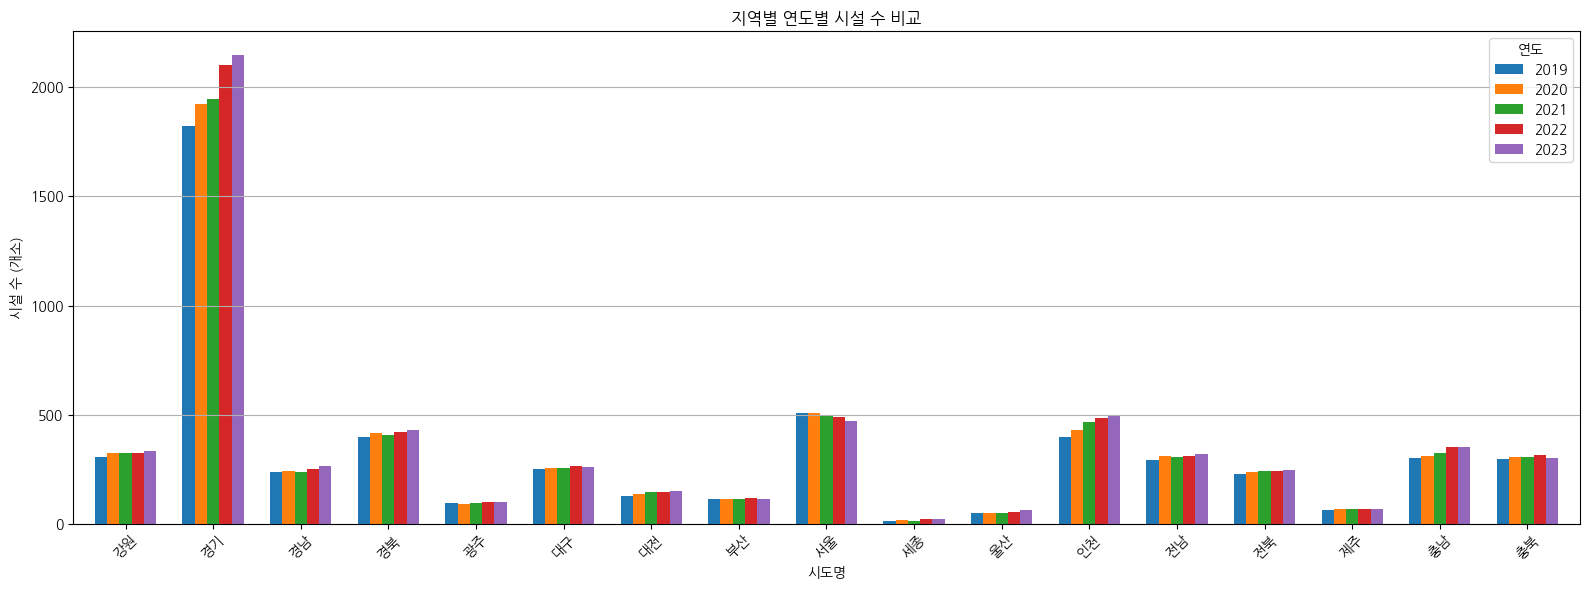

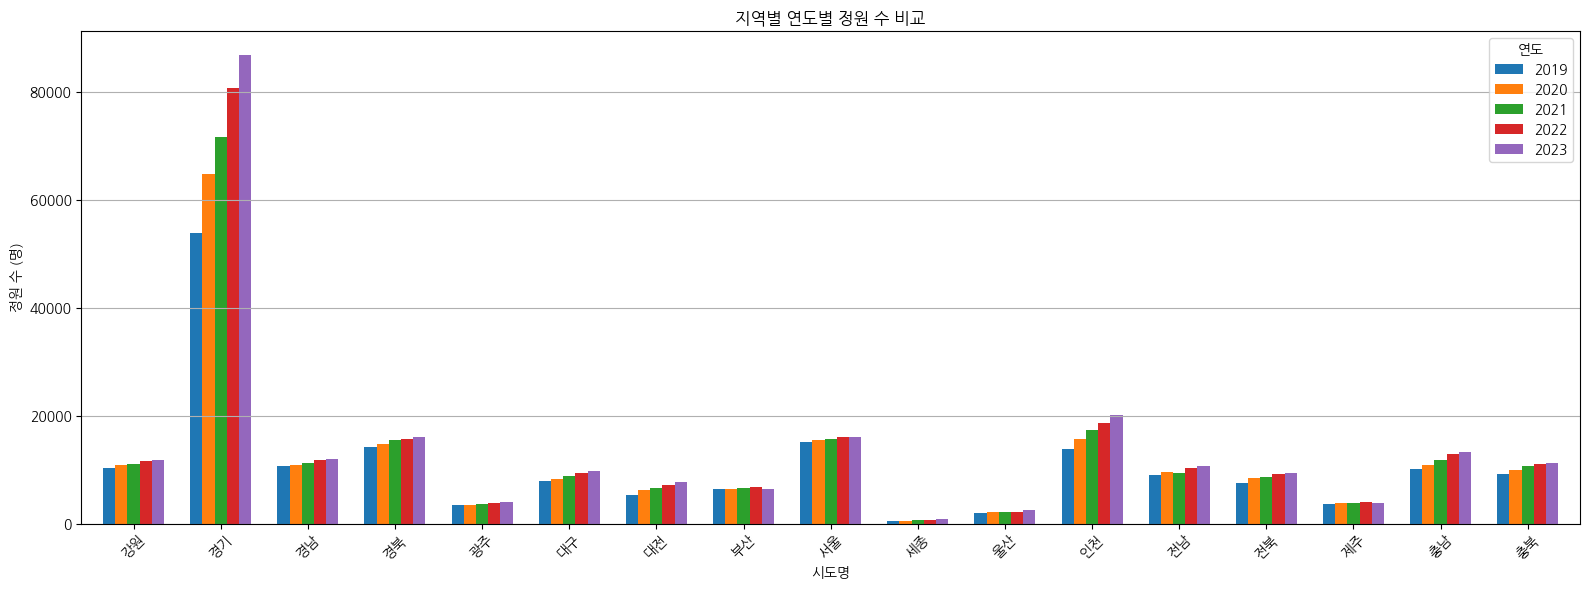

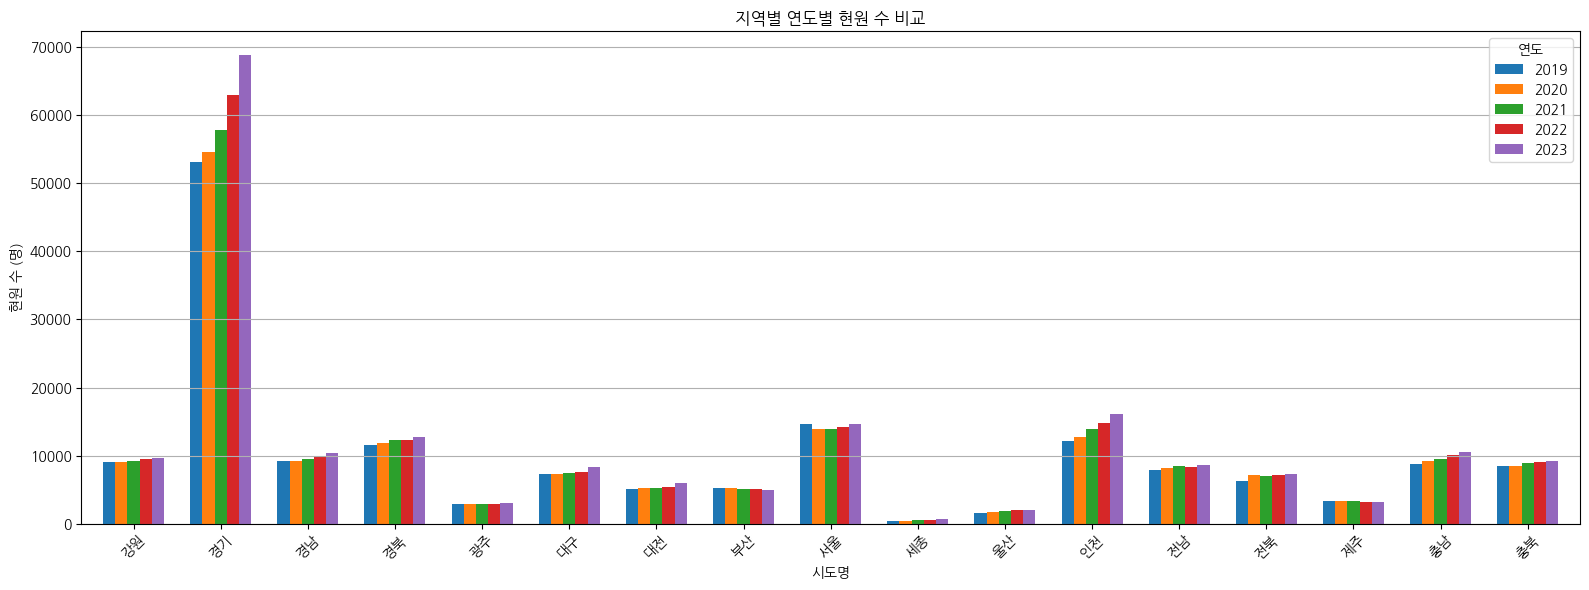

In [58]:
# 피벗테이블
pivot_facility = df_total.pivot(columns='연도', values='계_시설수')
pivot_capacity = df_total.pivot(columns='연도', values='계_입소정원')
pivot_use = df_total.pivot(columns='연도', values='계_입소현원')


# 지역별 시설 수
pivot_facility.plot(kind='bar', figsize=(16, 6), width=0.7)
plt.title('지역별 연도별 시설 수 비교')
plt.ylabel('시설 수 (개소)')
plt.xlabel('시도명')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='연도')
plt.show()

# 지역별 정원 수
pivot_capacity.plot(kind='bar', figsize=(16, 6), width=0.7)
plt.title('지역별 연도별 정원 수 비교')
plt.ylabel('정원 수 (명)')
plt.xlabel('시도명')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='연도')
plt.show()

# 지역별 현원 수
pivot_use.plot(kind='bar', figsize=(16, 6), width=0.7)
plt.title('지역별 연도별 현원 수 비교')
plt.ylabel('현원 수 (명)')
plt.xlabel('시도명')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='연도')
plt.show()

In [59]:
# 예시: 기존 df_total 형식일 경우
# df_total = pd.read_excel('노인요양시설_통합_5개년.xlsx') ← 사용자가 불러온 원본

# 수도권 시도 리스트 정의
metro = ['서울', '경기', '인천']

# 수도권/비수도권 구분 컬럼 추가
df_total['권역'] = df_total['시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 연도별로 권역별 정원 합계 구하기 (또는 '계_시설수' 써도 됨)
grouped = df_total.groupby(['권역', '연도'])['계_입소정원'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='연도', y='계_입소정원', hue='권역', marker='o')
plt.title('Elderly Admission Capacity: 수도권 vs 비수도권 (2019–2023)')
plt.xlabel('Year')
plt.ylabel('Total Admission Capacity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

KeyError: '시도명'

In [66]:
df_total

,시도명,65세이상 노인인구,계_시설수,계_입소정원,계_입소현원,노인요양시설수,노인요양시설_정원,노인요양시설_현원,노인요양공동생활가정수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,연도,노인인구당 총시설수,노인인구당 요양시설수,노인인구당 노인요양공동생활가정수,시설 1개당 이용 인원,노인요양시설 1개당 이용 인원,노인요양공동생활가정 1개당 이용 인원,권역
0,강원,368424,332,11905,9693,234,11041,8926,98,864,767,2023,9.011356,6.351378,2.659979,35.858434,47.183761,8.816327,비수도권
1,경기,2171451,2149,86823,68814,1629,82232,64874,520,4591,3940,2023,9.896608,7.501896,2.394712,40.401582,50.480049,8.828846,수도권
2,경남,673126,263,12093,10336,219,11704,10011,44,389,325,2023,3.907144,3.253477,0.653667,45.980989,53.442922,8.840909,비수도권
3,경북,633783,428,16021,12680,319,15055,11827,109,966,853,2023,6.7531,5.033268,1.719832,37.432243,47.194357,8.862385,비수도권
4,광주,235327,102,3982,3075,89,3870,2978,13,112,97,2023,4.334394,3.781971,0.552423,39.039216,43.483146,8.615385,비수도권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,전남,399715,294,9121,7876,211,8370,7215,85,751,661,2019,7.355241,5.278761,2.126515,31.023810,39.668246,8.835294,비수도권
81,전북,359690,228,7467,6249,167,6936,5808,61,531,441,2019,6.338792,4.642887,1.695905,32.750000,41.532934,8.704918,비수도권
82,제주,97470,65,3627,3283,56,3546,3207,9,81,76,2019,6.668719,5.745358,0.923361,55.800000,63.321429,9.000000,비수도권
83,충남,376534,302,10165,8735,199,9244,7937,103,921,798,2019,8.020524,5.285047,2.735477,33.658940,46.452261,8.941748,비수도권


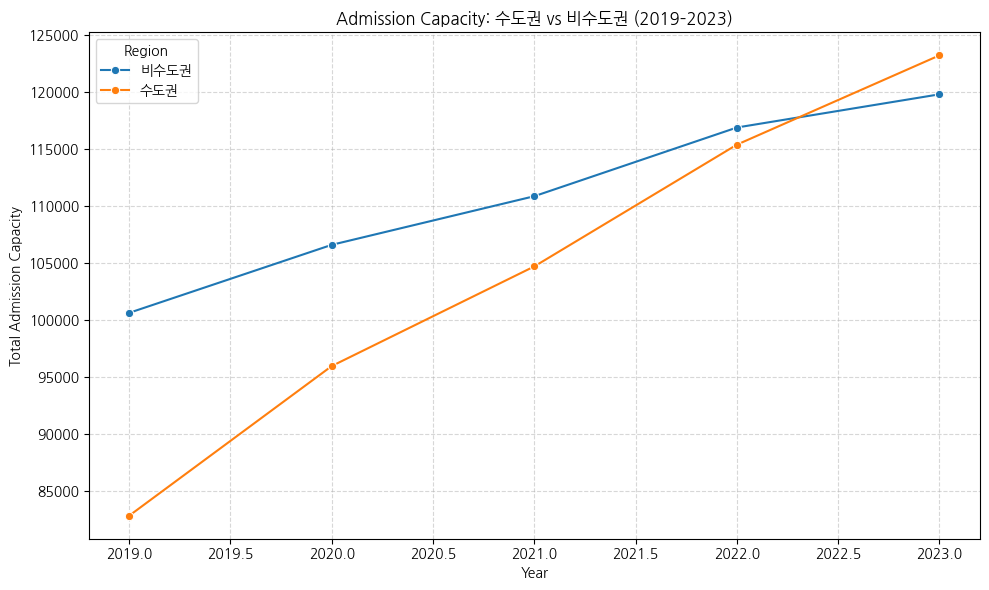

In [62]:
# 수도권 정의
df_total = df_total.reset_index()
metro = ['서울', '경기', '인천']

# 수도권/비수도권 컬럼 생성
df_total['권역'] = df_total['시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 연도별 권역별 입소정원 합계 집계
grouped = df_total.groupby(['권역', '연도'])['계_입소정원'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='연도', y='계_입소정원', hue='권역', marker='o')
plt.title('Admission Capacity: 수도권 vs 비수도권 (2019–2023)')
plt.xlabel('Year')
plt.ylabel('Total Admission Capacity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

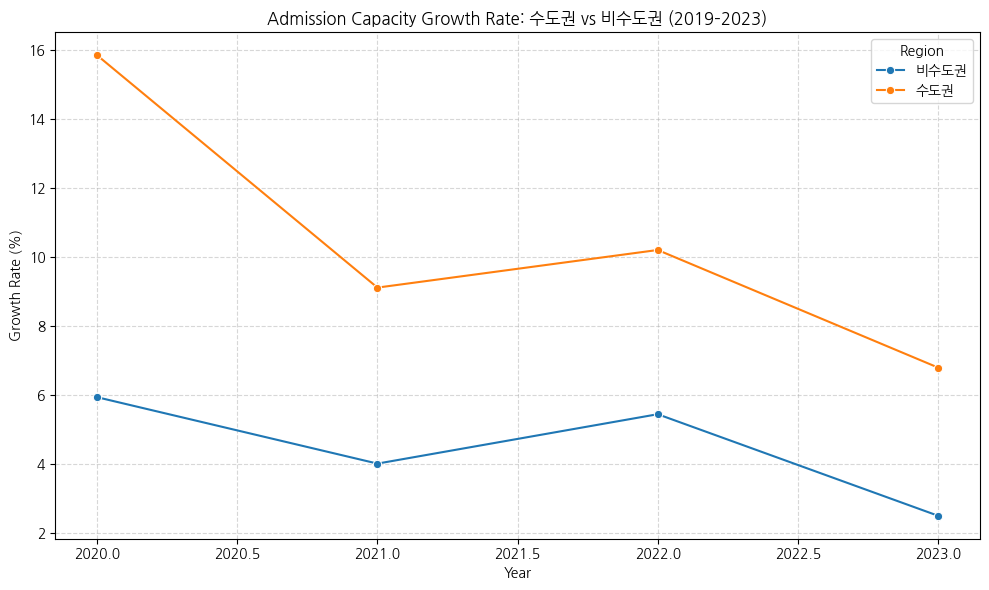

In [63]:
metro = ['서울', '경기', '인천']
df_total['권역'] = df_total['시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 연도별 권역별 정원 수 합계
grouped = df_total.groupby(['권역', '연도'])['계_입소정원'].sum().reset_index()

# 증가율 계산 (그룹별로 이전 연도와 비교)
grouped['정원_증가율(%)'] = grouped.groupby('권역')['계_입소정원'].pct_change() * 100
grouped['정원_증가율(%)'] = grouped['정원_증가율(%)'].round(2)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='연도', y='정원_증가율(%)', hue='권역', marker='o')
plt.title('Admission Capacity Growth Rate: 수도권 vs 비수도권 (2019–2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

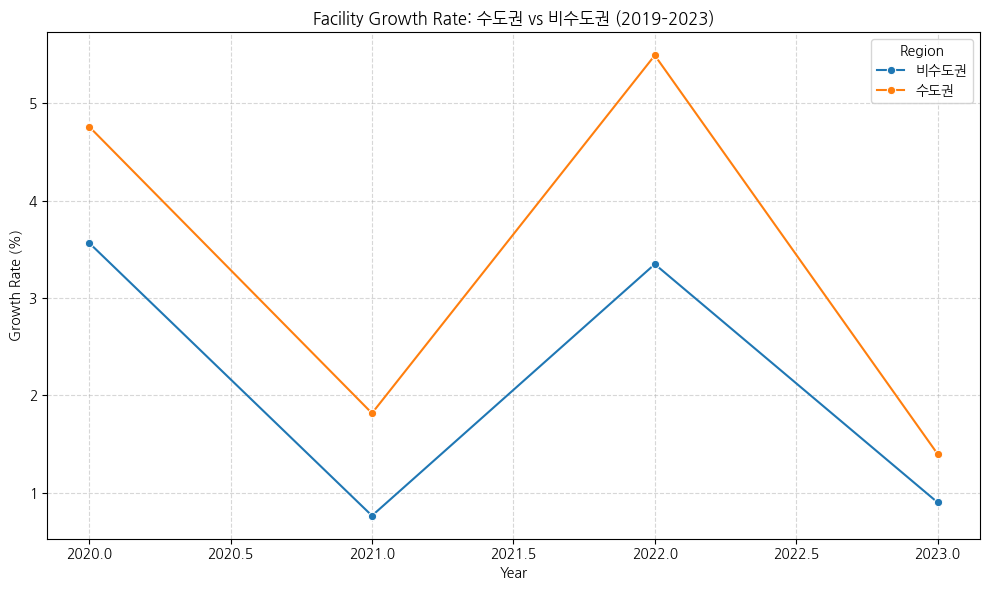

In [64]:
metro = ['서울', '경기', '인천']
df_total['권역'] = df_total['시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 연도별 권역별 시설 수 합계
grouped_facilities = df_total.groupby(['권역', '연도'])['계_시설수'].sum().reset_index()

# 증가율 계산 (그룹별로 이전 연도와 비교)
grouped_facilities['시설_증가율(%)'] = grouped_facilities.groupby('권역')['계_시설수'].pct_change() * 100
grouped_facilities['시설_증가율(%)'] = grouped_facilities['시설_증가율(%)'].round(2)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_facilities, x='연도', y='시설_증가율(%)', hue='권역', marker='o')
plt.title('Facility Growth Rate: 수도권 vs 비수도권 (2019–2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<ipython-input-65-47db6370598b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_metro['정원_비율'] = df_non_metro['계_입소정원'] / df_non_metro['65세이상 노인인구']
<ipython-input-65-47db6370598b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_metro['정원_비율_1000명당'] = df_non_metro['정원_비율'] * 1000


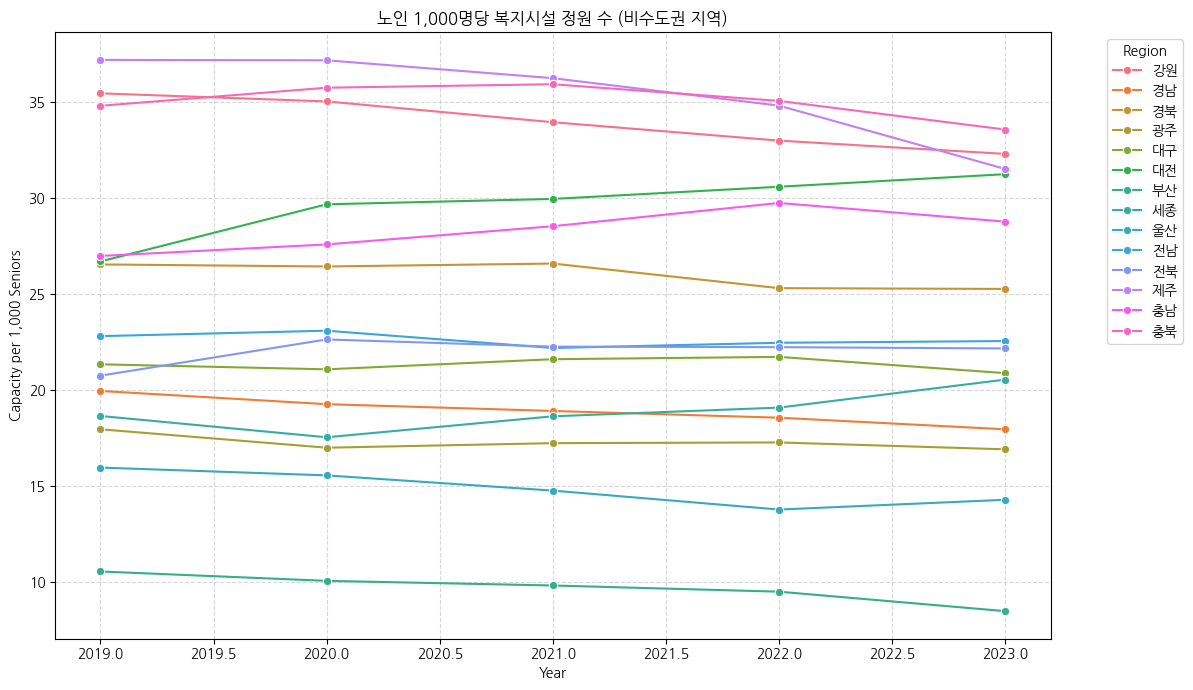

In [65]:
metro = ['서울', '경기', '인천']
df_total['권역'] = df_total['시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 3. 비수도권만 필터링
df_non_metro = df_total[df_total['권역'] == '비수도권']

# 4. 노인 인구 1명당 정원 수 계산 (비율로)
df_non_metro['정원_비율'] = df_non_metro['계_입소정원'] / df_non_metro['65세이상 노인인구']

# 또는 보기 쉽게 1,000명당 정원 수
df_non_metro['정원_비율_1000명당'] = df_non_metro['정원_비율'] * 1000

# 5. 시각화 (연도별, 시도별)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_non_metro, x='연도', y='정원_비율_1000명당', hue='시도명', marker='o')
plt.title('노인 1,000명당 복지시설 정원 수 (비수도권 지역)')
plt.xlabel('Year')
plt.ylabel('Capacity per 1,000 Seniors')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

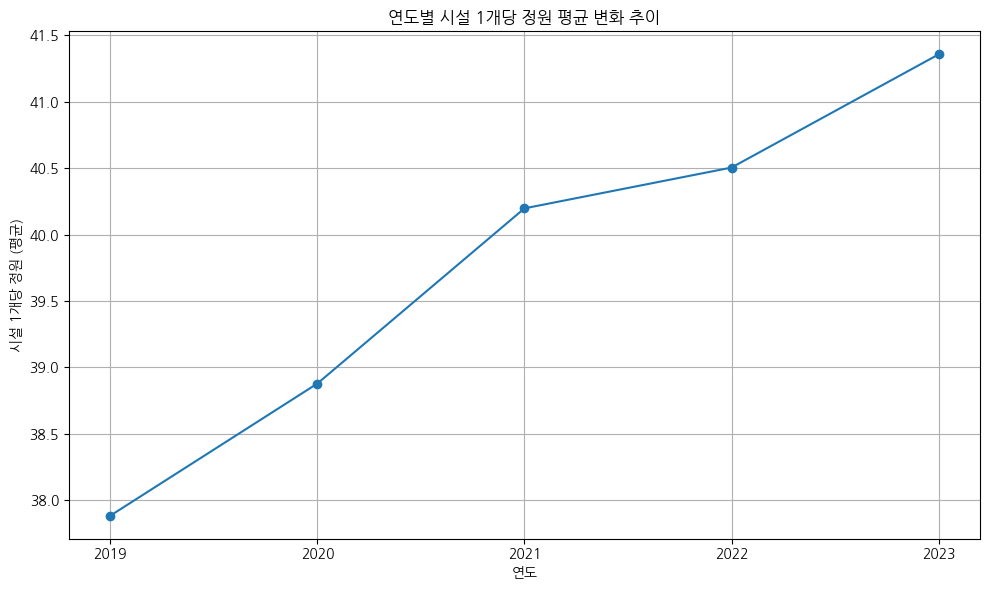

In [67]:
# 연도별 '시설 1개당 이용 인원' 평균 계산
yearly_avg_capacity = df_total.groupby('연도')['시설 1개당 이용 인원'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_capacity['연도'], yearly_avg_capacity['시설 1개당 이용 인원'], marker='o')
plt.title('연도별 시설 1개당 정원 평균 변화 추이')
plt.xlabel('연도')
plt.ylabel('시설 1개당 정원 (평균)')
plt.grid(True)
plt.xticks(yearly_avg_capacity['연도'])  # 연도 눈금 정확히 찍히게
plt.tight_layout()
plt.show()

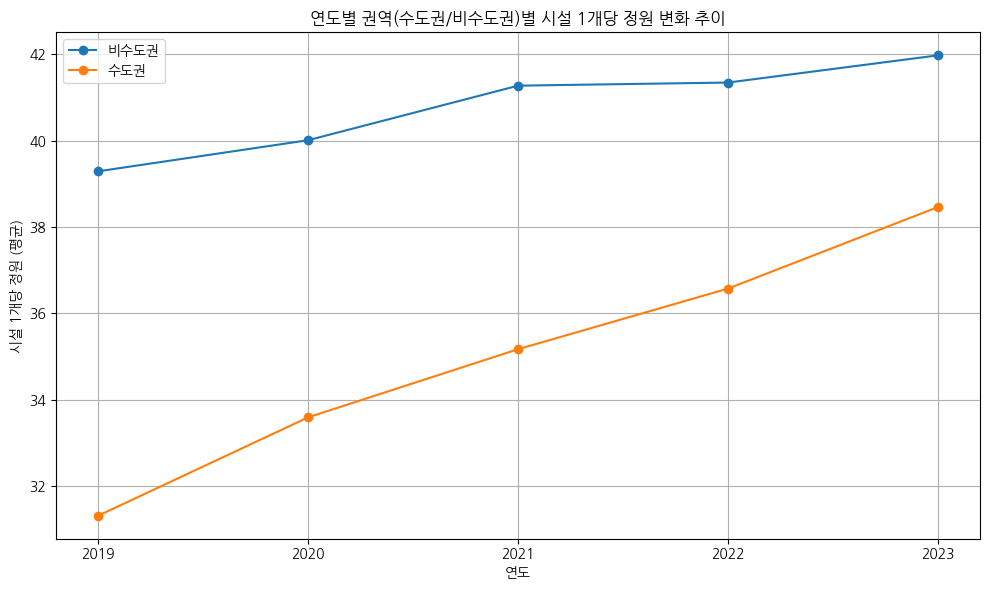

In [68]:
region_yearly = df_total.groupby(['연도', '권역'])['시설 1개당 이용 인원'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))

for region in region_yearly['권역'].unique():
    data = region_yearly[region_yearly['권역'] == region]
    plt.plot(data['연도'], data['시설 1개당 이용 인원'], marker='o', label=region)

plt.title('연도별 권역(수도권/비수도권)별 시설 1개당 정원 변화 추이')
plt.xlabel('연도')
plt.ylabel('시설 1개당 정원 (평균)')
plt.grid(True)
plt.xticks(region_yearly['연도'].unique())  # 연도 눈금 맞추기
plt.legend()
plt.tight_layout()
plt.show()

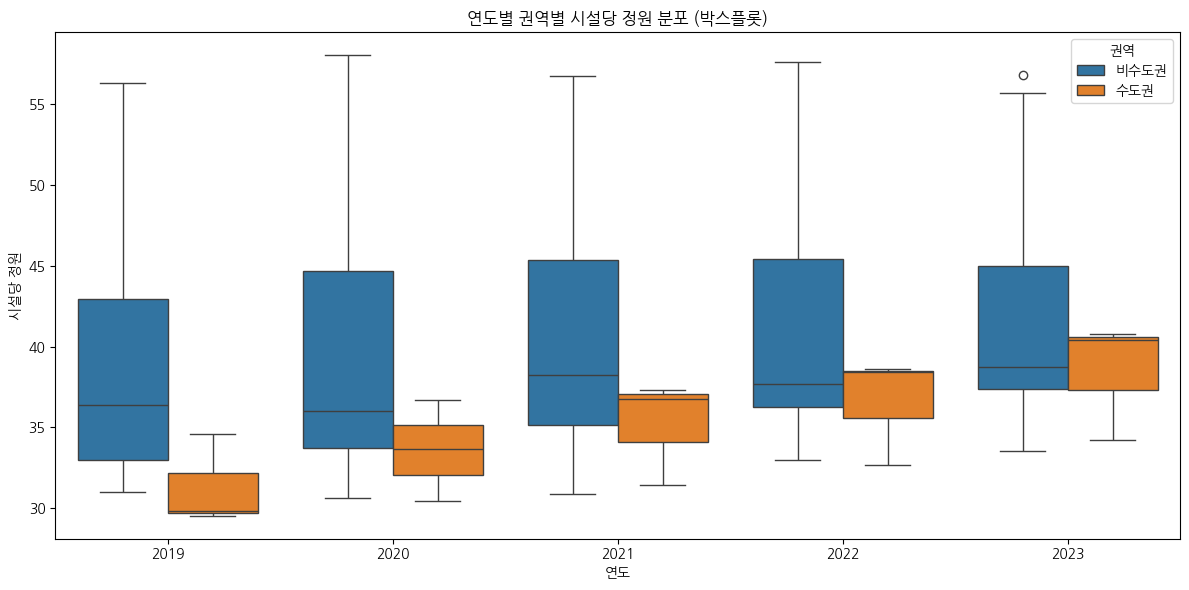

In [69]:
df_total['시설당 정원'] = df_total['계_입소정원'] / df_total['계_시설수']

# 시각화: 연도별 + 권역별 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_total, x='연도', y='시설당 정원', hue='권역')
plt.title('연도별 권역별 시설당 정원 분포 (박스플롯)')
plt.xlabel('연도')
plt.ylabel('시설당 정원')
plt.legend(title='권역')
plt.tight_layout()
plt.show()